In [54]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [135]:
filename = str(input()).rstrip() # Caso3: flower.png
method = int(input()) # Caso3: 3
save = int(input()) # Caso3:  0

airplane.png
3
0


In [136]:
input_img = imageio.imread('../images/'+filename)
input_img

Array([[ 86, 112, 124, ..., 184, 183, 183],
       [ 90, 110, 127, ..., 180, 179, 178],
       [ 92, 101, 131, ..., 178, 177, 177],
       ...,
       [ 16,  23,  32, ...,  39,  35,  36],
       [ 16,  21,  33, ...,  61,  48,  40],
       [ 16,  21,  32, ...,  93,  78,  63]], dtype=uint8)

In [137]:
if method == 3:
    sigma_row = float(input()) # Caso5: 50
    sigma_col = float(input()) # Caso5: 50

30
45


In [124]:
def gaussian_kernel(x, sigma):
    return (1/(2*np.pi*(sigma**2)))*np.exp((-x**2)/(2*(sigma**2)))

In [123]:
def kernel(sigma, n):
    kernel =  np.zeros((1,n))
    a = int((n-1)/2)
    for x in range(n):
        kernel[0,x] = gaussian_kernel(x-a, sigma)
        
    return kernel

In [132]:
def scaling(image):
    return ((image- np.min(image))*255/np.max(image))

In [128]:
def vignette_filter(input_img, sigma_row, sigma_col):
    Wrow = kernel(sigma_row, input_img.shape[1])
    Wcol = kernel(sigma_col, input_img.shape[0])
    W = (np.transpose(Wcol) * Wrow)
    output_img = scaling(W *input_img)
    return output_img

In [138]:
output_img = vignette_filter(input_img, sigma_row, sigma_col)
output_img

Array([[0.06807314, 0.09890687, 0.1220334 , ..., 0.18108182, 0.16160677,
        0.14485331],
       [0.07427493, 0.10127997, 0.13031162, ..., 0.18469364, 0.16481013,
        0.14689931],
       [0.07912168, 0.09690812, 0.14007437, ..., 0.19033006, 0.16982909,
        0.15222324],
       ...,
       [0.01376029, 0.02206819, 0.03421664, ..., 0.04170153, 0.03358202,
        0.03096066],
       [0.01320443, 0.01933527, 0.0338605 , ..., 0.06259062, 0.04419489,
        0.03301108],
       [0.01266477, 0.01854504, 0.03149249, ..., 0.09152505, 0.06888157,
        0.04986753]])

In [146]:
rse = np.sqrt(np.sum((input_img - output_img)**2))

# Printing the error rounding to 4 decimal places.
print('{:.4f}'.format(rse))

21103.4051


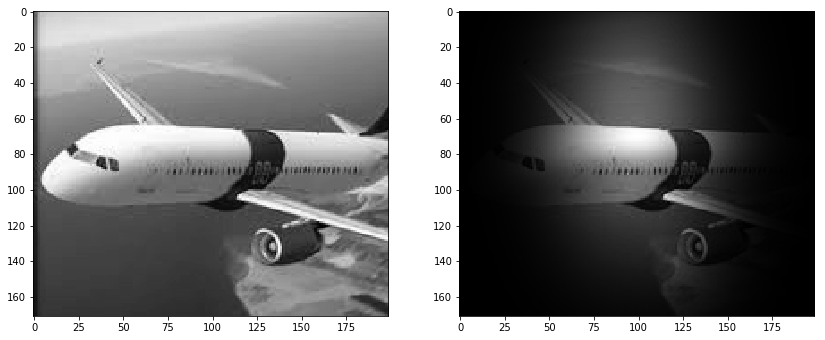

In [99]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(input_img, cmap="gray")

plt.subplot(122)
plt.imshow(output_img, cmap="gray")